**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

Homework notebook

### 학번:  2019

### 이름:  한수호

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [130]:
# Python ≥3.7 is required
import sys
print("Python: ", sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.8.0 is required
import tensorflow as tf
print("TF version: ", tf.__version__)
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# # Where to save the figures
# from pathlib import Path

# IMAGES_PATH = Path() / "images" / "ann"
# IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Python:  sys.version_info(major=3, minor=10, micro=14, releaselevel='final', serial=0)
1.4.2
TF version:  2.16.1


### Exercise 10.1
Define and plot activation functions ELU, leaky ReLU and ReLU6 using keras.activation functions.  
Refer to practice code and copy all the necessary codes


(-2.0, 10.0)

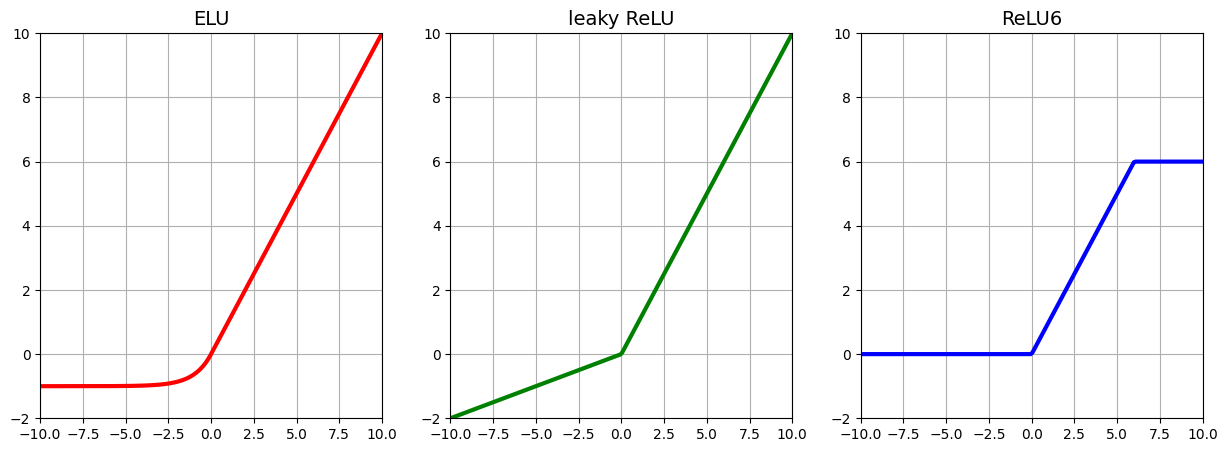

In [131]:
# Exercise 10.1
# Define activation functions using keras.activations
z = np.linspace(-10, 10, 200)


# ELU
elu_ftn = tf.keras.activations.elu

# leaky ReLU
leaky_relu_ftn = tf.nn.leaky_relu

# ReLU6
relu6_ftn = tf.nn.relu6

# Plot
max_z = 5
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(z, elu_ftn(z), "r-", linewidth=3)
plt.title("ELU")
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-2, 10]) 

plt.subplot(132)
plt.plot(z, leaky_relu_ftn(z), "g-", linewidth=3)
plt.title("leaky ReLU")
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-2, 10]) 

plt.subplot(133)
plt.plot(z, relu6_ftn(z), "b-", linewidth=3)
plt.title("ReLU6")
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-2, 10]) 

### Exercise 10.2  
Fashion MNIST 실습코드를 이용하여 아래에서 요구하는 hidden layer의 수와 neuron의 수를 갖는 MLP 모델을 구성하고 학습시킨후 training loss와 test accuracy, step당 학습시간, 파라미터의 크기를 비교하시오. 모든 경우 learning curve를 그리시오.
1. (300, 300, 100)
2. (300, 100, 30)
3. (1000, 100)
4. (300, 30)
5. (100, 30)
6. 위의 실습 코드 결과와 함께 결과를 비교하고 분석하시오. 

In [132]:
# Ex10.2
# Preparation codes
from tensorflow import keras
import time

fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid= X_train_full[:-5000] / 255., X_train_full[-5000:] / 255.
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.

In [133]:
tf.random.set_seed(42)

In [134]:
history = []
results = {'layers':[],'training loss':[], 'test accuracy':[], 'step당 학습시간':[], '파라미터의 크기':[],}
_batch_size = 20000
_epochs = 30

def _create_MLPmodel(i, num_neurons):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
    model.add(tf.keras.layers.Flatten())
    for j in num_neurons:
        model.add(tf.keras.layers.Dense(j, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

    model.summary()
    start_time = time.time()
    history.append(model.fit(X_train, y_train, batch_size=_batch_size, epochs=_epochs, validation_data=(X_valid, y_valid)))
    end_time = time.time()
    training_time = end_time - start_time

    print(f"Training time of model {i}: {training_time:.2f} seconds")

    total_params = model.count_params()
    print(f"Total parameters of model {i}: {total_params:,}")
    
    results['layers'].append(num_neurons)
    results['training loss'].append(history[i-1].history['loss'][-1])
    results['test accuracy'].append(history[i-1].history['val_accuracy'][-1])
    results['step당 학습시간'].append(training_time)
    results['파라미터의 크기'].append(total_params)

#### 1. (300, 300, 100)

In [135]:
_create_MLPmodel(1, [300, 300, 100])

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,910 (1.36 MB)

 Trainable params: 356,910 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.1289 - loss: 2.3491 - val_accuracy: 0.1496 - val_loss: 2.3039
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1503 - loss: 2.2955 - val_accuracy: 0.1680 - val_loss: 2.2540
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1673 - loss: 2.2472 - val_accuracy: 0.1846 - val_loss: 2.2080
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1815 - loss: 2.2025 - val_accuracy: 0.2018 - val_loss: 2.1644
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1953 - loss: 2.1599 - val_accuracy: 0.2160 - val_loss: 2.1224
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2109 - loss: 2.1186 - val_accuracy: 0.2360 - val_loss: 2.0815
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2322 - loss: 2.0785 - val_accuracy: 0.2586 - val_loss: 2.0417
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2582 - loss: 2.0395 - val_accuracy: 0.2958 - val_loss: 2.0031

#### 2. (300, 100, 30)

In [136]:
_create_MLPmodel(2, [300, 100, 30])

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,940 (1.03 MB)

 Trainable params: 268,940 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.1210 - loss: 2.3204 - val_accuracy: 0.1486 - val_loss: 2.2722
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1640 - loss: 2.2603 - val_accuracy: 0.2002 - val_loss: 2.2338
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2071 - loss: 2.2259 - val_accuracy: 0.2302 - val_loss: 2.2058
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2351 - loss: 2.1996 - val_accuracy: 0.2490 - val_loss: 2.1818
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2514 - loss: 2.1762 - val_accuracy: 0.2590 - val_loss: 2.1593
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2643 - loss: 2.1539 - val_accuracy: 0.2682 - val_loss: 2.1375
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2724 - loss: 2.1322 - val_accuracy: 0.2772 - val_loss: 2.1161
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2802 - loss: 2.1108 - val_accuracy: 0.2856 - val_loss: 2.0951

#### 3. (1000, 100)

In [137]:
_create_MLPmodel(3, [1000, 100])

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 886,110 (3.38 MB)

 Trainable params: 886,110 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.1117 - loss: 2.3325 - val_accuracy: 0.1734 - val_loss: 2.2567
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1826 - loss: 2.2439 - val_accuracy: 0.2480 - val_loss: 2.1784
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2476 - loss: 2.1682 - val_accuracy: 0.3114 - val_loss: 2.1071
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3036 - loss: 2.0988 - val_accuracy: 0.3662 - val_loss: 2.0410
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3594 - loss: 2.0346 - val_accuracy: 0.4190 - val_loss: 1.9803
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.4146 - loss: 1.9755 - val_accuracy: 0.4658 - val_loss: 1.9238
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4626 - loss: 1.9203 - val_accuracy: 0.5066 - val_loss: 1.8703
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4999 - loss: 1.8677 - val_accuracy: 0.5380 - val_loss:

#### 4. (300, 30)

In [138]:
_create_MLPmodel(4, [300, 30])

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_40 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 30)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,840 (956.41 KB)

 Trainable params: 244,840 (956.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.1094 - loss: 2.3813 - val_accuracy: 0.1350 - val_loss: 2.2879
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1418 - loss: 2.2734 - val_accuracy: 0.2076 - val_loss: 2.2103
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2134 - loss: 2.2032 - val_accuracy: 0.2768 - val_loss: 2.1514
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2701 - loss: 2.1484 - val_accuracy: 0.3202 - val_loss: 2.1011
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3121 - loss: 2.1009 - val_accuracy: 0.3532 - val_loss: 2.0558
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3443 - loss: 2.0575 - val_accuracy: 0.3780 - val_loss: 2.0137
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3693 - loss: 2.0172 - val_accuracy: 0.3954 - val_loss: 1.9742
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3841 - loss: 1.9791 - val_accuracy: 0.4118 - val_loss: 1.9368


#### 5. (100, 30)

In [139]:
_create_MLPmodel(5, [300, 30])

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_41 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 30)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,840 (956.41 KB)

 Trainable params: 244,840 (956.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.0853 - loss: 2.4312 - val_accuracy: 0.1086 - val_loss: 2.2980
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1229 - loss: 2.2869 - val_accuracy: 0.1816 - val_loss: 2.2066
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1888 - loss: 2.2034 - val_accuracy: 0.2340 - val_loss: 2.1410
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2388 - loss: 2.1409 - val_accuracy: 0.2792 - val_loss: 2.0845
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2815 - loss: 2.0867 - val_accuracy: 0.3204 - val_loss: 2.0337
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3207 - loss: 2.0376 - val_accuracy: 0.3584 - val_loss: 1.9869
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3563 - loss: 1.9924 - val_accuracy: 0.3942 - val_loss: 1.9435
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3870 - loss: 1.9505 - val_accuracy: 0.4242 - val_loss: 1.9029


#### 6  


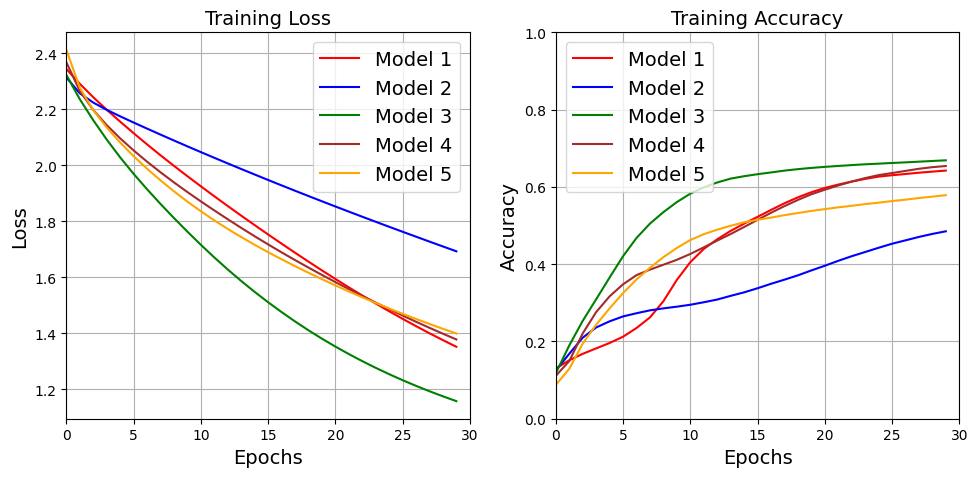

In [140]:
colors = ["red", "blue", "green", "brown", "orange"]

plt.figure(figsize=(10, 5))

plt.subplot(121)
for idx, hist in enumerate(history):
    plt.plot(hist.history['loss'], label=f'Model {idx + 1}', color=colors[idx])
    plt.title(f'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim([0, 30]) 
    # plt.ylim([0, 1]) 
    plt.grid(True)
    plt.legend()   
plt.subplot(122)
for idx, hist in enumerate(history):
    plt.plot(hist.history['accuracy'], label=f'Model {idx + 1}', color=colors[idx])
    plt.title(f'Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim([0, 30]) 
    plt.ylim([0, 1]) 
    plt.grid(True)
    plt.legend()   
    
plt.tight_layout()
plt.show()

In [141]:
import pandas as pd
from IPython.display import display
df = pd.DataFrame(results)
df.index = [f'Model {i+1}' for i in range(len(df))]
pd.options.display.float_format = '{:,.4f}'.format
display(df)

,layers,training loss,test accuracy,step당 학습시간,파라미터의 크기
Model 1,"[300, 300, 100]",1.3515,0.6578,8.1874,356910
Model 2,"[300, 100, 30]",1.6924,0.4926,7.0250,268940
Model 3,"[1000, 100]",1.1574,0.6858,12.7794,886110
Model 4,"[300, 30]",1.3777,0.6654,6.5920,244840
Model 5,"[300, 30]",1.3989,0.5950,6.9420,244840


### Exercise 10.3  

Refer the previous cells. 
Plot the loss curves and obtain mse_test values for the following learning rates and epochs
1) 2e-3, epoch = 5  
2) 2e-3, epoch = 10  
3) 1e-3, epoch = 10  
4) 5e-4, epoch = 10  
5) 5e-4, epoch = 20     
Discuss the results for the above hyperparameters.

In [142]:
# Model definition

In [143]:
#1

In [144]:
#2,3,4

In [145]:
#5

In [146]:
#6 Discussion

### Exercise 10.4
아래의 파라미터를 갖는 fully-connected network에 대해 다음 물음에 답하시오  
Number of input features: Nf  
Number of neurons in ith hidden nodes: Nni  
Number of hidden layers: Nh  
Number of output node: No  

1. MAC(multiply and addition) operation의 수를 위에서 주어진 파라미터를 이용하여 식으로 표현하시오. 단, Nh=3이다.  
2. 위의 california housing dataset에 대해 Nh=3, Nn1=Nn2=Nn3=30일 때 30 epoch 동안 학습후 loss, val_loss, mse_test값을 구하시오. Hyperparameter는 Regression MLP의 실습 코드와 같은 값을 이용한다. Tensorboard를 위해 log10 directory에 get_log_dir 함수를 이용하여 subdirectory를 생성하시오.  
3. Nh=2일 때 MAC operation 수가 최대한 비슷하도록 Nn1=Nn2를 구하고 2와 같은 조건으로 학습시키고 loss, val_loss, mse_test값을 구하시오.
4. Nh=1일 때 MAC operation 수가 최대한 비슷하도록 Nn1을 구하고 2와 같은 조건으로 학습시키고 loss, val_loss, mse_test값을 구하시오.  
5. 2-4번의 결과를 비교하고 분석하시오. 또한 Tensorboard에서 learning curve를 비교하시오.

In [147]:
#1. Number of MAC operations   
#Answer: 


In [148]:
#2.


In [149]:
#3
# number of MAC operation for 3 hidden layers : 
# 8 x 30 + 30 x 30 + 30 x 30 + 30 x 1 = 2070
# number of MAC operation for 2 hidden layers : 
# 8 x n + n x n  + n x 1 = 2070 -> n = 41


In [150]:
#4
# number of MAC operation for 1 hidden layers : 
# 8 x n + n x 1 = 2070 -> n = 230


In [151]:
#5
